# Model Training

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score
from sklearn.datasets import make_classification

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import Callback, EarlyStopping

from helper.data_cleaning import clean_profile, clean_portfolio, join_data, join_consumer_data

In [2]:
profile = clean_profile('assets/profile.json')
portfolio = clean_portfolio('assets/portfolio.json')

In [3]:
coupon_1 = portfolio.loc[portfolio.index[:1]]
coupon_1_consumer_data = join_data(coupon_1, profile)
coupon_1_consumer_data.set_index(profile.index, inplace=True)

consumer_feature = pd.read_csv('training_data/feature_2_cleaned.csv')
consumer_feature.rename(columns={"id": "consumer_id"}, inplace=True)
consumer_feature.set_index('consumer_id', inplace=True)

sensitivity = pd.read_csv('training_data/coupon_sensitivity.csv')
sensitivity.set_index('id', inplace=True)

y = pd.read_csv('training_data/target_cleaned.csv', index_col='id')

coupon_1_y = y[portfolio.index[:1]]

coupon_1_consumer_data = join_consumer_data([coupon_1_y, consumer_feature, coupon_1_consumer_data, sensitivity])

In [4]:
coupon_1_consumer_data

,ae264e3637204a6fb9bb56bc8210ddfd,Avg Daily spending,Highest daily spending,Lowest daily spending,count days no spending,count days spending 0_to_5,count days spending 5_to_10,count days spending 10_to_15,count days spending 15_to_20,count days spending 20_plus,...,110000-120000,120000-130000,type_1_coupon_sensitivity,type_2_coupon_sensitivity,type_3_coupon_sensitivity,type_4_coupon_sensitivity,type_5_coupon_sensitivity,type_6_coupon_sensitivity,type_7_coupon_sensitivity,type_8_coupon_sensitivity
7366bef4c288476dab78b09a33d0e692,0,12.402333,315.47,8.21,24.0,0.0,2.0,2.0,0.0,1.0,...,0.0,0.0,-1.283000,-1.283000,-2.566000,-0.641500,-1.832857,-1.283000,-2.566000,-1.283000
b912b714bf5e40609f6ff25a9a542a9c,0,0.831333,7.14,1.96,24.0,4.0,2.0,2.0,0.0,0.0,...,0.0,0.0,-0.086000,-0.086000,-0.172000,-0.043000,-0.122857,-0.086000,-0.172000,-0.086000
46b3c686bbbd4495940b4da488e10ed6,1,6.916333,19.07,4.84,14.0,1.0,4.0,4.0,7.0,0.0,...,0.0,0.0,-0.669379,-0.669379,-1.338759,-0.334690,-0.956256,-0.669379,-1.338759,-0.669379
a14d4f2ec359464f8d4aeac17b755903,1,10.112667,48.71,16.45,18.0,0.0,0.0,0.0,3.0,9.0,...,0.0,0.0,-0.975621,-0.975621,-1.951241,-0.487810,-1.393744,-0.975621,-1.951241,-0.975621
f37d9566b54547d8bdc64cc949ddab90,0,6.283000,47.46,13.46,22.0,0.0,0.0,0.0,1.0,4.0,...,0.0,0.0,-0.649966,-0.649966,-1.299931,-0.324983,-0.928522,-0.649966,-1.299931,-0.649966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bbee4cecbebb4347859c73b9971550d5,0,8.094000,54.07,11.91,19.0,0.0,0.0,0.0,4.0,5.0,...,0.0,0.0,-0.837310,-0.837310,-1.674621,-0.418655,-1.196158,-0.837310,-1.674621,-0.837310
f4e0715b897c480e9cb7b72cec1a8607,0,1.075000,20.10,12.15,28.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,-0.111207,-0.111207,-0.222414,-0.055603,-0.158867,-0.111207,-0.222414,-0.111207
da72743f0fd04812a1b9334b0b9ad403,0,0.495000,6.78,1.09,26.0,3.0,1.0,1.0,0.0,0.0,...,0.0,0.0,-0.051207,-0.051207,-0.102414,-0.025603,-0.073153,-0.051207,-0.102414,-0.051207
a29ea9a53fc747dfb077c3f2ef84f83a,0,4.195333,30.62,19.82,25.0,0.0,0.0,0.0,1.0,4.0,...,0.0,1.0,-0.150857,-0.434000,-0.868000,-0.217000,-0.620000,-0.434000,-0.868000,-0.434000


coupon ae264e3637204a6fb9bb56bc8210ddfd
roc_auc score is 0.8605541526258342
accuracy score is 0.930379746835443
recall score is 0.7615262321144675
precision score is 0.7651757188498403
f1 score is 0.7633466135458167
---------------------------------------------------------------


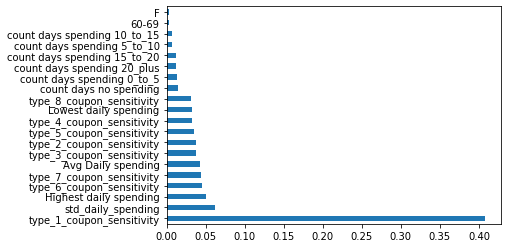

In [10]:
columns = coupon_1_consumer_data.columns

X_train, X_test, y_train, y_test = train_test_split(coupon_1_consumer_data[columns[1:]], coupon_1_consumer_data[columns[0]], test_size=0.30, random_state=11)

clf = RandomForestClassifier(
                             random_state=11,
                             n_estimators=400,
                             min_samples_split=20,
                             class_weight='balanced'
                            )
clf.fit(X_train, y_train)  

feat_importances = pd.Series(clf.feature_importances_, index=columns[1:])
feat_importances.nlargest(20).plot(kind='barh')
y_pred = clf.predict(X_test)
print(f'coupon {columns[0]}')
print(f'roc_auc score is {roc_auc_score(y_test, y_pred)}')
print(f'accuracy score is {accuracy_score(y_test, y_pred)}')
print(f'recall score is {recall_score(y_test, y_pred)}')
print(f'precision score is {precision_score(y_test, y_pred)}')
print(f'f1 score is {f1_score(y_test, y_pred)}')
print('---------------------------------------------------------------')

In [2]:
# X_1 = pd.read_csv('training_data/feature_1_cleaned.csv', index_col='id')
profile = clean_profile('assets/profile.json')
portfolio = clean_portfolio('assets/portfolio.json')
X_2 = pd.read_csv('training_data/feature_2_cleaned.csv', index_col='id')

sensitivity = pd.read_csv('training_data/coupon_sensitivity.csv', index_col='id')
y = pd.read_csv('training_data/target_cleaned.csv', index_col='id')

In [3]:
common_index = set(X_1.index).intersection(set(y.index))
common_index = common_index.intersection(set(X_2.index))
common_index = common_index.intersection(set(sensitivity.index))

for row in sensitivity.index:
    if row not in common_index:
        sensitivity.drop(row, axis=0, inplace=True)
        
for row in X_1.index:
    if row not in common_index:
        X_1.drop(row, axis=0, inplace=True) 
        
for row in X_2.index:
    if row not in common_index:
        X_2.drop(row, axis=0, inplace=True) 
        
for row in y.index:
    if row not in common_index:
        y.drop(row, axis=0, inplace=True) 
print(X_1.shape)
print(X_2.shape)
print(y.shape)
print(sensitivity.shape)

(14219, 21)
(14219, 10)
(14219, 8)
(14219, 8)


## Visualization

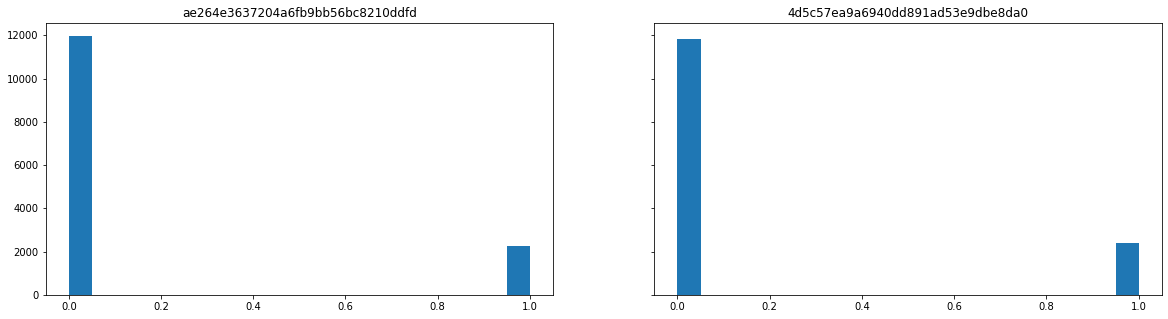

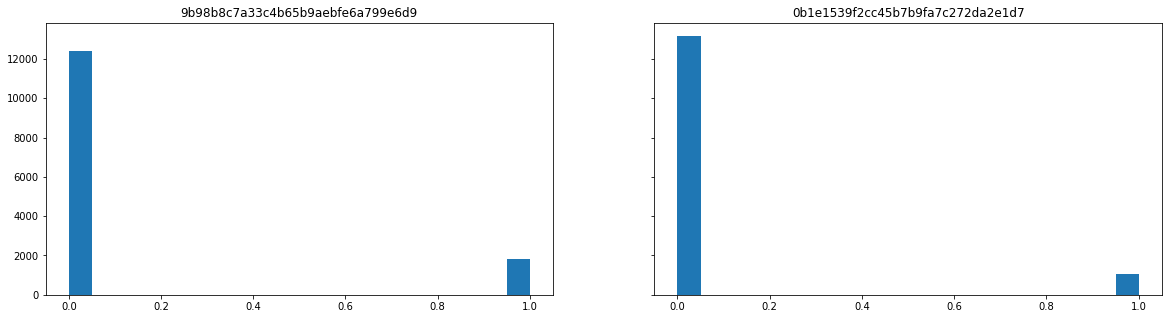

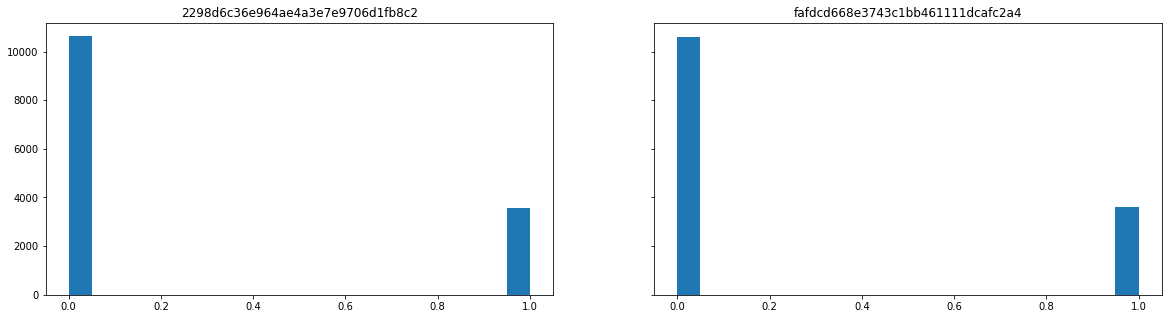

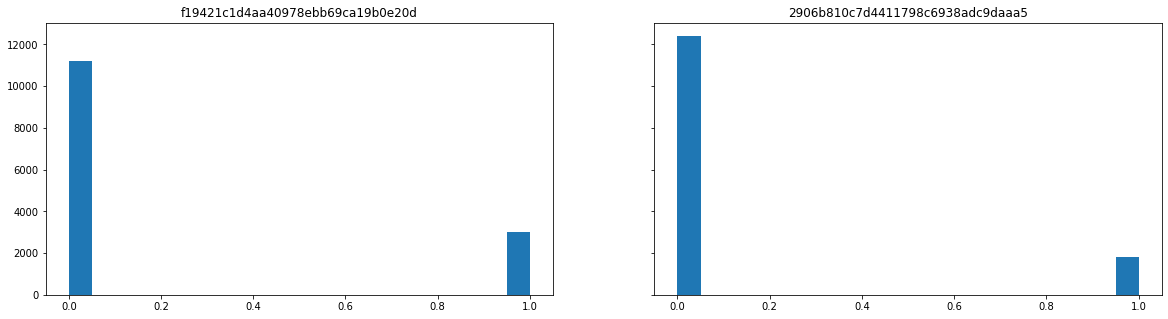

In [4]:
feature_df = y

for i in range(0, len(feature_df.columns), 2) :
    n_bins = 20
    fig, axs = plt.subplots(1, 2, sharey=True, figsize=(20,5))
    
    x = feature_df[feature_df.columns[i]]
    axs[0].hist(x, bins=n_bins)
    axs[0].set_title(feature_df.columns[i])

    if i+1 < len(feature_df.columns):
        _y = feature_df[feature_df.columns[i+1]]
        axs[1].hist(_y, bins=n_bins)
        axs[1].set_title(feature_df.columns[i+1])

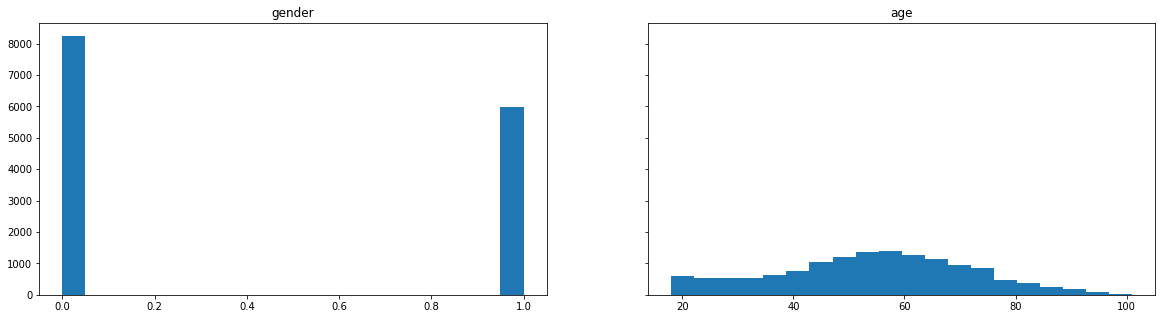

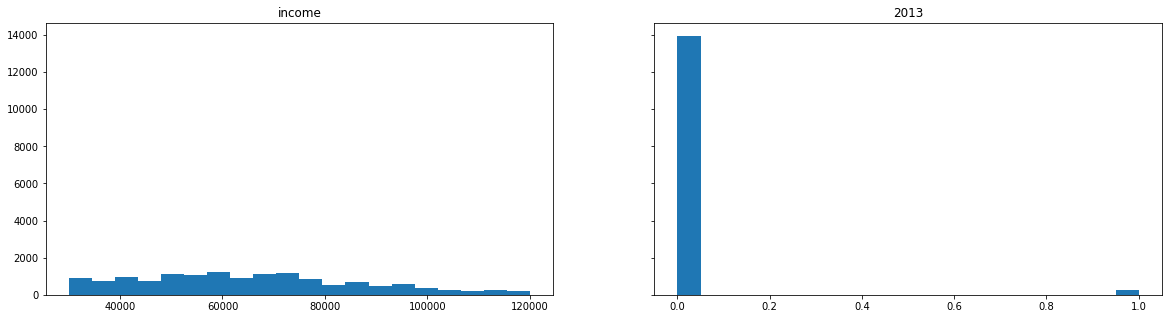

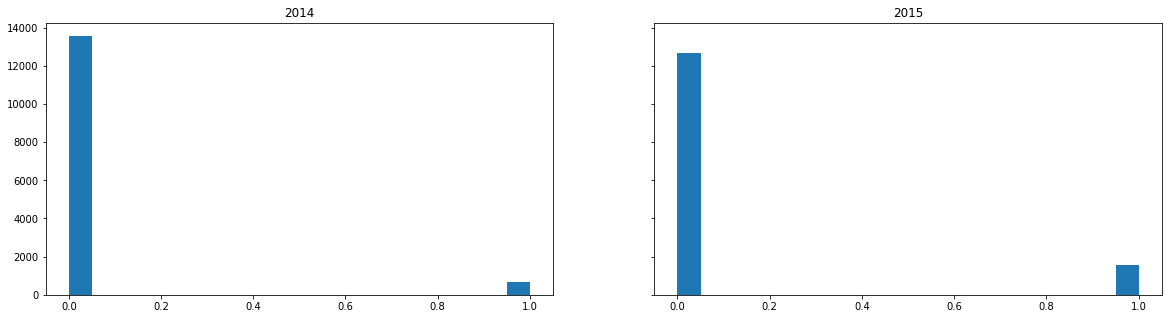

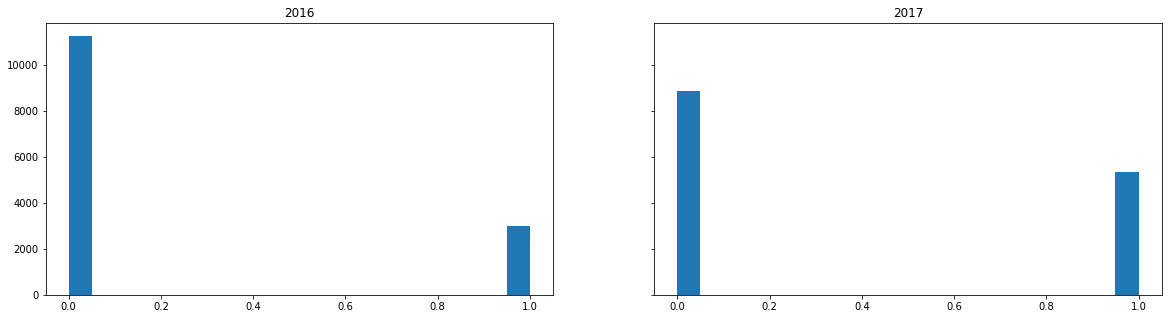

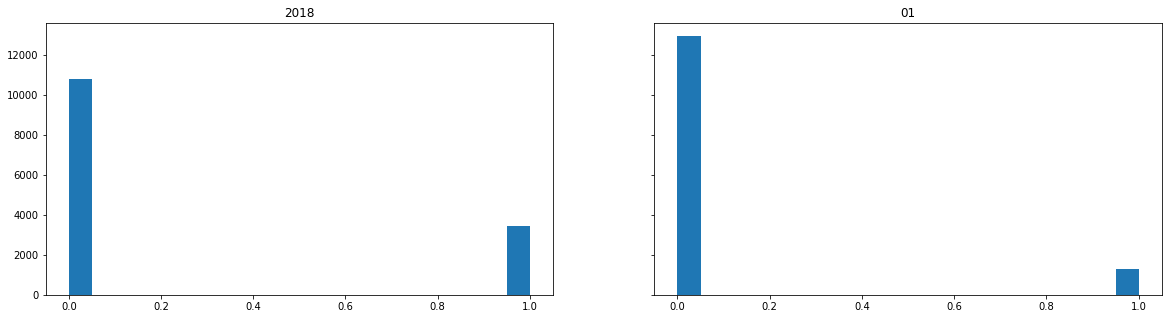

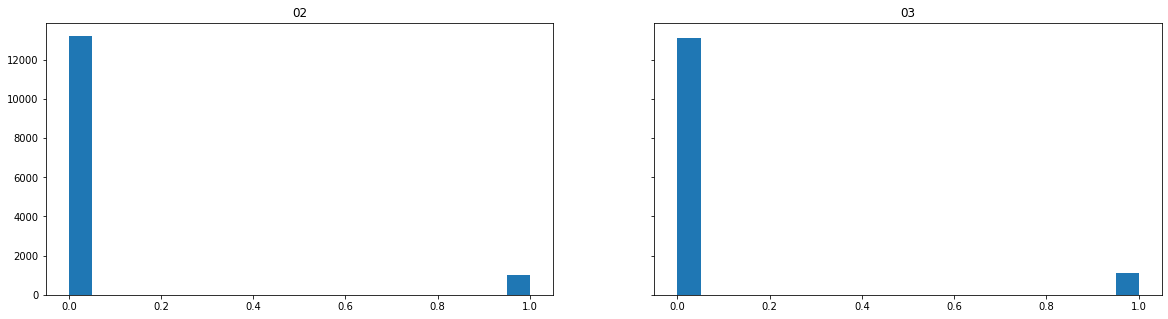

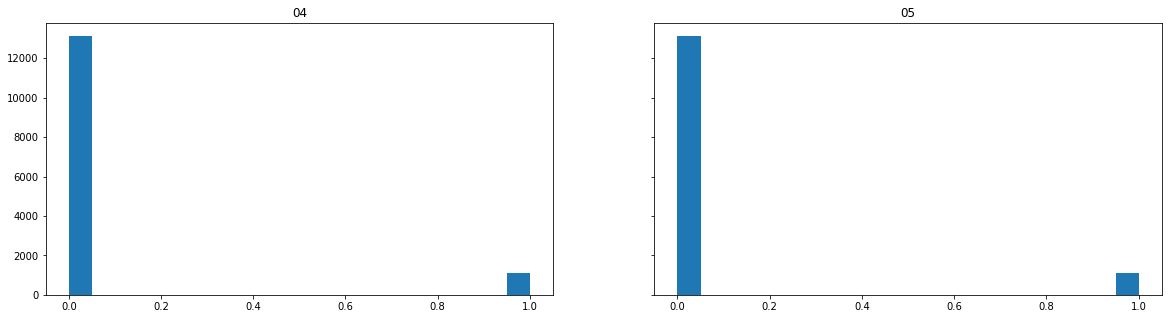

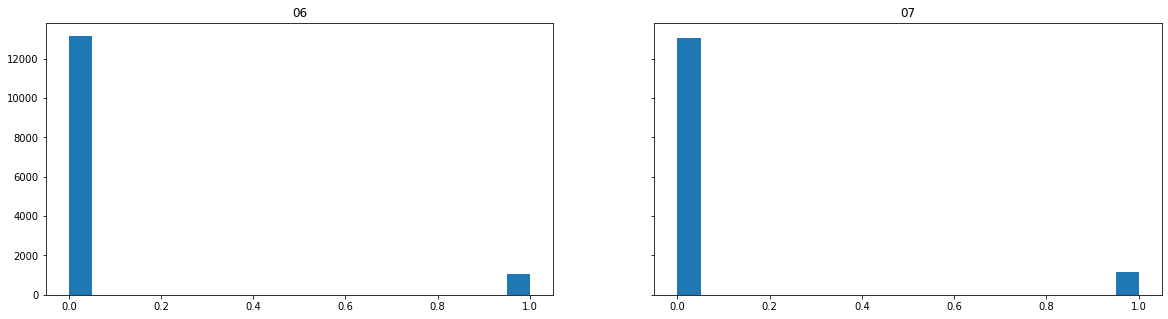

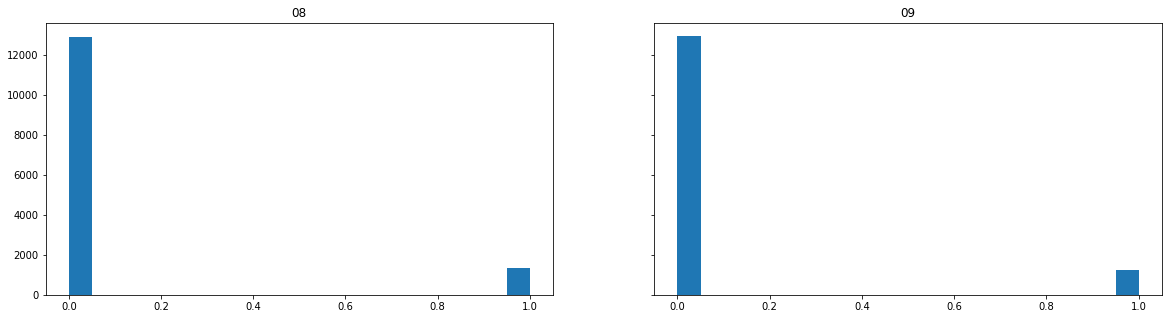

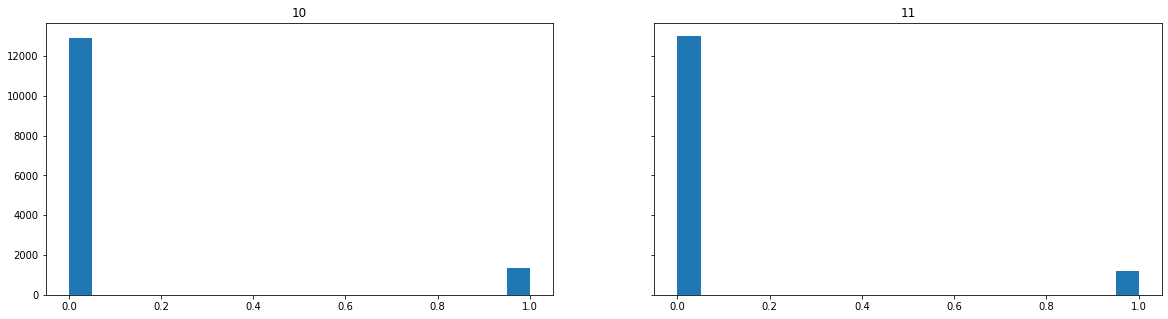

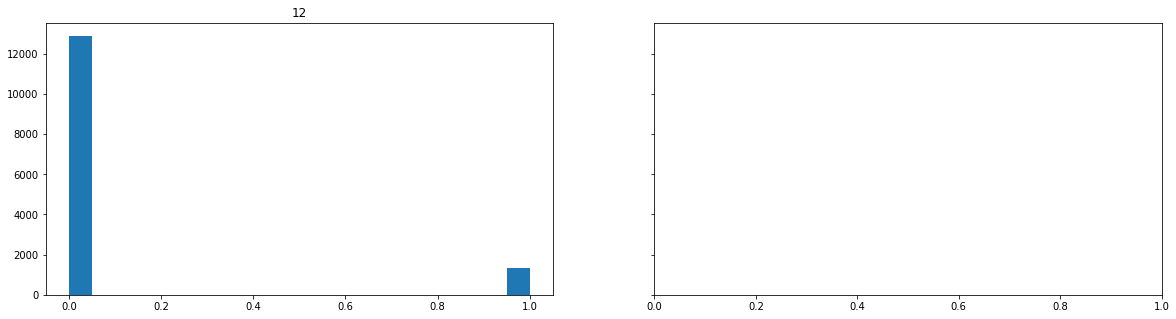

In [5]:
feature_df = X_1

for i in range(0, len(feature_df.columns), 2) :
    n_bins = 20
    fig, axs = plt.subplots(1, 2, sharey=True, figsize=(20,5))
    
    x = feature_df[feature_df.columns[i]]
    axs[0].hist(x, bins=n_bins)
    axs[0].set_title(feature_df.columns[i])

    if i+1 < len(feature_df.columns):
        _y = feature_df[feature_df.columns[i+1]]
        axs[1].hist(_y, bins=n_bins)
        axs[1].set_title(feature_df.columns[i+1])

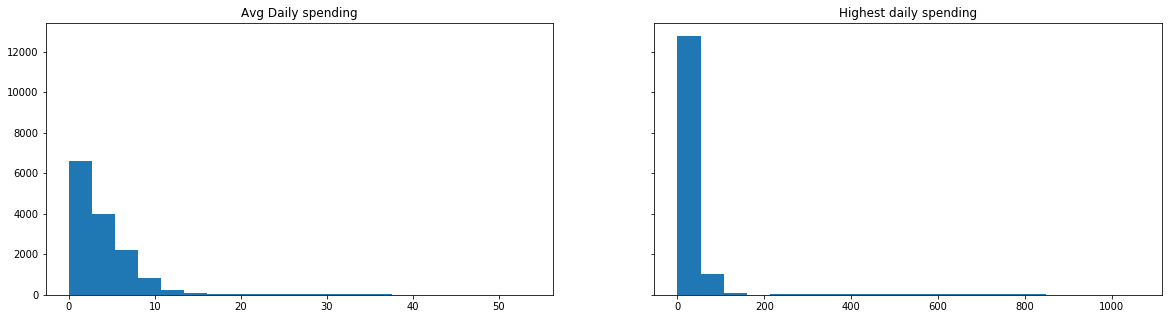

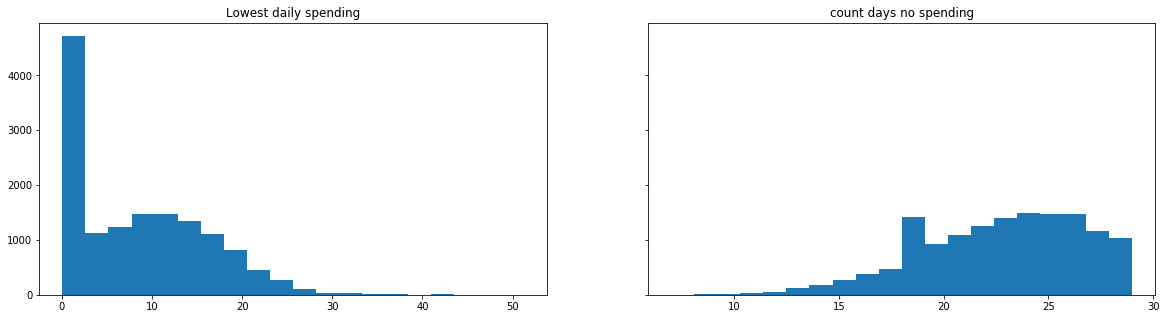

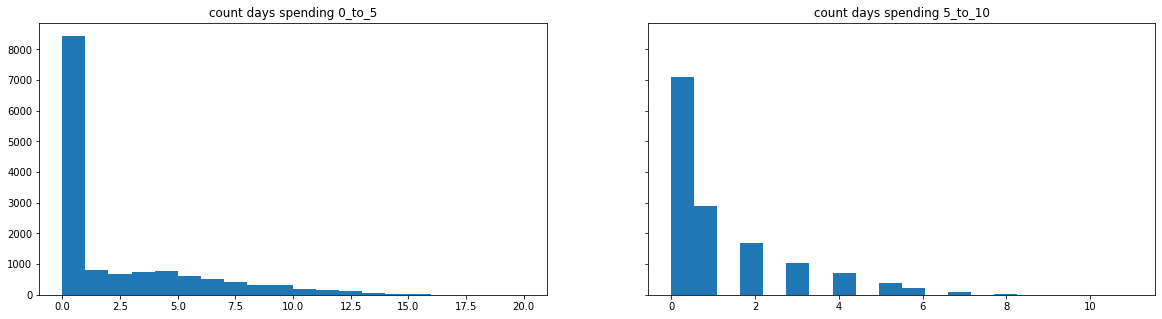

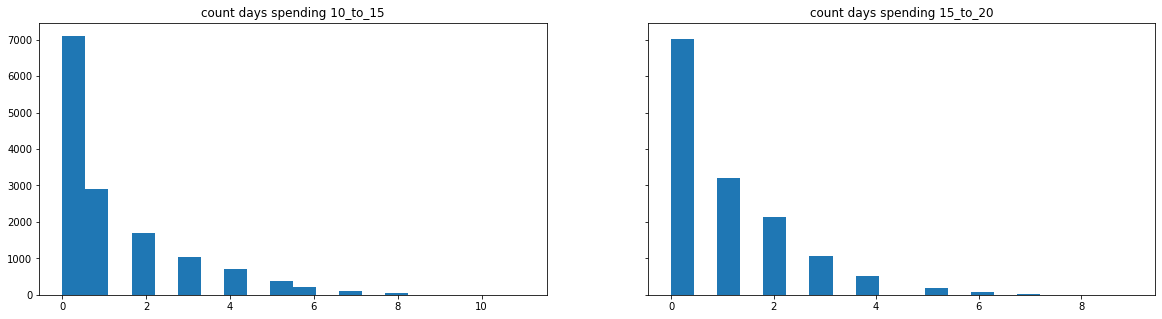

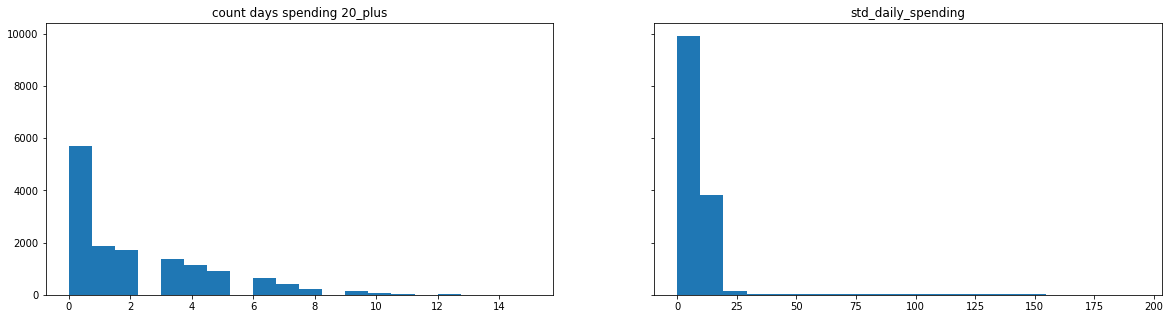

In [6]:
feature_df = X_2

for i in range(0, len(feature_df.columns), 2) :
    n_bins = 20
    fig, axs = plt.subplots(1, 2, sharey=True, figsize=(20,5))
    
    x = feature_df[feature_df.columns[i]]
    axs[0].hist(x, bins=n_bins)
    axs[0].set_title(feature_df.columns[i])

    if i+1 < len(feature_df.columns):
        _y = feature_df[feature_df.columns[i+1]]
        axs[1].hist(_y, bins=n_bins)
        axs[1].set_title(feature_df.columns[i+1])

## TODO: Longest consective spending

## Modeling Feature Group 1

In [7]:
y.head()

,ae264e3637204a6fb9bb56bc8210ddfd,4d5c57ea9a6940dd891ad53e9dbe8da0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0b1e1539f2cc45b7b9fa7c272da2e1d7,2298d6c36e964ae4a3e7e9706d1fb8c2,fafdcd668e3743c1bb461111dcafc2a4,f19421c1d4aa40978ebb69ca19b0e20d,2906b810c7d4411798c6938adc9daaa5
id,,,,,,,,
7366bef4c288476dab78b09a33d0e692,0,1,0,0,0,0,0,0
b912b714bf5e40609f6ff25a9a542a9c,0,0,0,0,0,1,0,0
46b3c686bbbd4495940b4da488e10ed6,1,1,0,0,1,0,0,0
a14d4f2ec359464f8d4aeac17b755903,1,0,0,0,1,1,0,0
f37d9566b54547d8bdc64cc949ddab90,0,0,0,0,1,0,0,0


In [8]:
#X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1.values, y['ae264e3637204a6fb9bb56bc8210ddfd'].values, test_size=0.30, random_state=13)

In [11]:
X = pd.concat((X_1, X_2, sensitivity), axis=1)

columns = X.columns

X = preprocessing.scale(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=11)

/Users/lileo/Documents/projects/starbucks_ml/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [13]:
for coupon in y_train.columns:

    clf = KNe(
                                 random_state=11,
                                 min_samples_split=10,
                                 class_weight='balanced'
                                )
    clf.fit(X_train, y_train.loc[:][coupon])  

    feat_importances = pd.Series(clf.feature_importances_, index=columns)
    feat_importances.nlargest(14).plot(kind='barh')
    y_pred = clf.predict(X_test)
    print(f'coupon {coupon}')
    print(f'roc_auc score is {roc_auc_score(y_test[coupon], y_pred)}')
    print(f'accuracy score is {accuracy_score(y_test[coupon], y_pred)}')
    print(f'recall score is {recall_score(y_test[coupon], y_pred)}')
    print(f'precision score is {precision_score(y_test[coupon], y_pred)}')
    print(f'f1 score is {f1_score(y_test.loc[:][coupon], y_pred)}')
    print('---------------------------------------------------------------')

NameError: name 'KNe' is not defined

coupon ae264e3637204a6fb9bb56bc8210ddfd
roc_auc score is 0.5010576249315353
accuracy score is 0.8476324425691514
recall score is 0.009538950715421303
precision score is 0.18181818181818182
f1 score is 0.018126888217522657
---------------------------------------------------------------


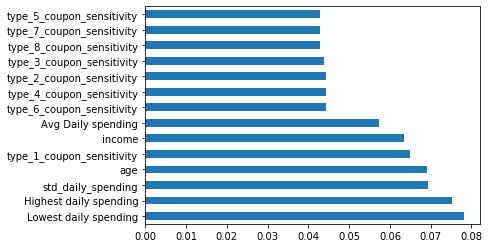

In [20]:
for coupon in y_train.columns[:1]:

    clf = RandomForestClassifier(
                                 random_state=11,
                                 n_estimators=200,
                                 min_samples_split=10,
                                 class_weight='balanced'
                                )
    clf.fit(X_train, y_train.loc[:][coupon])  

    feat_importances = pd.Series(clf.feature_importances_, index=columns)
    feat_importances.nlargest(14).plot(kind='barh')
    y_pred = clf.predict(X_test)
    print(f'coupon {coupon}')
    print(f'roc_auc score is {roc_auc_score(y_test[coupon], y_pred)}')
    print(f'accuracy score is {accuracy_score(y_test[coupon], y_pred)}')
    print(f'recall score is {recall_score(y_test[coupon], y_pred)}')
    print(f'precision score is {precision_score(y_test[coupon], y_pred)}')
    print(f'f1 score is {f1_score(y_test[coupon], y_pred)}')
    print('---------------------------------------------------------------')

## Test with CNN

In [17]:
def auc(y_true, y_pred):
    auc = tf.metrics.auc(y_true, y_pred)[1]
    K.get_session().run(tf.local_variables_initializer())
    return auc
    
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(22,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])

# different dropoff rate, 

# automl from h2o
 
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', auc])
    
for coupon in y_train.columns:
    model.fit(X_train, y_train[coupon], epochs=200, batch_size=2)

    _, _, test_acc = model.evaluate(X_test, y_test[coupon])
    print('Test accuracy:', test_acc)

Train on 11537 samples
Epoch 1/200
11537/11537 [==============================] - 6s 484us/sample - loss: 0.4565 - acc: 0.8337 - auc: 0.5034
Epoch 2/200
11537/11537 [==============================] - 5s 471us/sample - loss: 0.4448 - acc: 0.8394 - auc: 0.4928
Epoch 3/200
11537/11537 [==============================] - 5s 467us/sample - loss: 0.4434 - acc: 0.8395 - auc: 0.4958
Epoch 4/200
11537/11537 [==============================] - 5s 474us/sample - loss: 0.4424 - acc: 0.8395 - auc: 0.4989
Epoch 5/200
11537/11537 [==============================] - 5s 469us/sample - loss: 0.4423 - acc: 0.8395 - auc: 0.5042
Epoch 6/200
11537/11537 [==============================] - 5s 469us/sample - loss: 0.4412 - acc: 0.8395 - auc: 0.5056
Epoch 7/200
11537/11537 [==============================] - 6s 485us/sample - loss: 0.4414 - acc: 0.8395 - auc: 0.5079
Epoch 8/200
11537/11537 [==============================] - 5s 474us/sample - loss: 0.4413 - acc: 0.8395 - auc: 0.5099
Epoch 9/200
11537/11537 [========

In [24]:
from sklearn.neighbors import KNeighborsClassifier

for coupon in y_train.columns:

    clf = KNeighborsClassifier()
    clf.fit(X_train, y_train.loc[:][coupon])  

#     print('roc_auc score:', clf.score(X_test_1, y_test_1.loc[:][coupon]))
    y_pred = clf.predict(X_test)
    print(f'coupon {coupon}')
    print(f'roc_auc score is {roc_auc_score(y_test.loc[:][coupon], y_pred)}')
    print(f'accuracy score is {accuracy_score(y_test.loc[:][coupon], y_pred)}')
    print(f'recall score is {recall_score(y_test.loc[:][coupon], y_pred)}')
    print(f'precision score is {precision_score(y_test.loc[:][coupon], y_pred)}')
    print(f'f1 score is {f1_score(y_test_1.loc[:][coupon], y_pred)}')
    print('---------------------------------------------------------------')

coupon ae264e3637204a6fb9bb56bc8210ddfd
roc_auc score is 0.49541578738566244
accuracy score is 0.8273830155979203
recall score is 0.018223234624145785
precision score is 0.10666666666666667
f1 score is 0.0311284046692607
---------------------------------------------------------------
coupon 4d5c57ea9a6940dd891ad53e9dbe8da0
roc_auc score is 0.4978082079539519
accuracy score is 0.8065857885615252
recall score is 0.03067484662576687
precision score is 0.15151515151515152
f1 score is 0.05102040816326531
---------------------------------------------------------------
coupon 9b98b8c7a33c4b65b9aebfe6a799e6d9
roc_auc score is 0.5055679446493411
accuracy score is 0.8530329289428076
recall score is 0.027989821882951654
precision score is 0.20754716981132076
f1 score is 0.04932735426008968
---------------------------------------------------------------
coupon 0b1e1539f2cc45b7b9fa7c272da2e1d7
roc_auc score is 0.4992534527808884
accuracy score is 0.9272097053726169
recall score is 0.0
precision sco

## Questions:

1. Are these features good enough?
2. Represent trend
3. Hyperopt

## HyperOpts

In [ ]:
X = pd.concat((X_1, X_2), axis=1)
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.20, random_state=10)

In [ ]:
y_train[:, 0]

In [ ]:
from hpsklearn import HyperoptEstimator, any_classifier, any_preprocessing
from hyperopt import tpe
import numpy as np

In [ ]:
from hpsklearn import HyperoptEstimator, any_classifier, any_preprocessing
from hyperopt import tpe
import numpy as np

# Instantiate a HyperoptEstimator with the search space and number of evaluations

# auc score, recall, f1
estim = HyperoptEstimator(classifier=gradient_boosting('gradient_boosting'),
                          preprocessing=[],
                          algo=tpe.suggest,
                          max_evals=40,
                          trial_timeout=120)

# Search the hyperparameter space based on the data

estim.fit(X_train, y_train[:, 0])

In [ ]:
print(estim.score(X_test, y_test[:, 0]))

In [ ]:
## island and gap